In [3]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

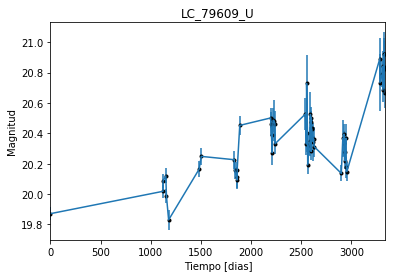

In [4]:
data = np.genfromtxt('LC_79609_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79609_U')
plt.savefig("LC_79609_U.pdf")

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

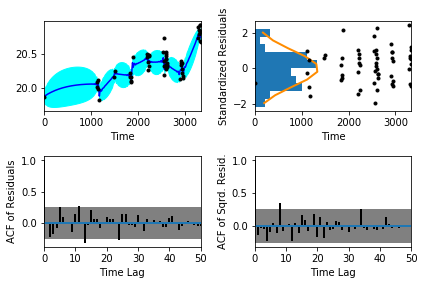

In [7]:
sample.assess_fit()

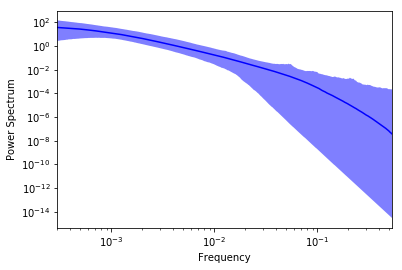

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

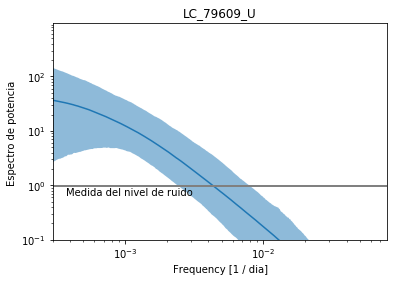

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79609_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79609_U')

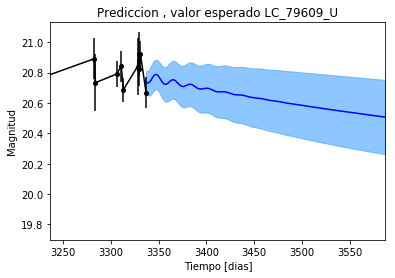

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79609_U')

Text(0.5,1,'Prediccion, Caminos simuladosLC_79609_U')

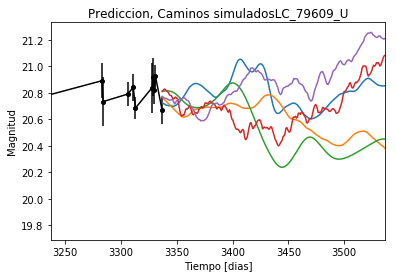

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79609_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


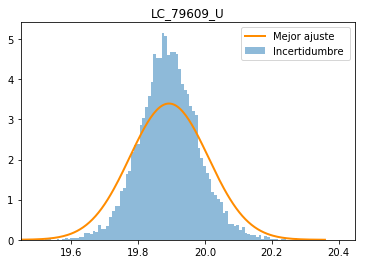

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79609_U')
plt.savefig("Mejor_ajuste_LC_79609_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79609_U')

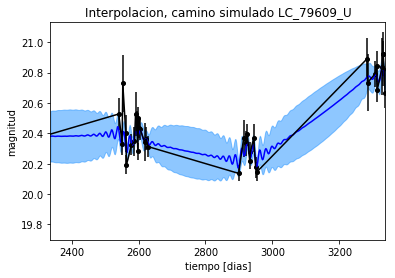

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_U')

Text(0.5,1,'Interpolacion, camino simulado LC_79609_U')

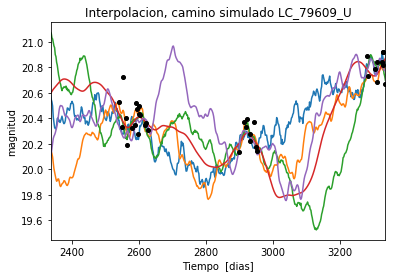

In [12]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79609_U')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 814.191067295
Median: 0.0255425215361
Standard deviation: 0.221741712477
68% credibility interval: [ 0.00186014  0.25551706]
95% credibility interval: [  3.89063273e-04   8.47282168e-01]
99% credibility interval: [  3.15537891e-04   1.02909755e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 529.017032424
Median: 0.00713475091489
Standard deviation: 0.113735446627
68% credibility interval: [ 0.00061656  0.07887689]
95% credibility interval: [  3.31747844e-04   4.18747552e-01]
99% credibility interval: [  3.07139759e-04   7.17733518e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 503.138366153
Median: 0.0884217446527


In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 726.960865211
Median: 57.5721459676
Standard deviation: 1.81373131546
68% credibility interval: [ 55.57972444  58.79988108]
95% credibility interval: [ 52.56198052  59.66759114]
99% credibility interval: [ 50.26878235  60.20612972]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 576.593576431
Median: 1.51302978305
Standard deviation: 2.76442010892
68% credibility interval: [ 0.23241326  5.49768223]
95% credibility interval: [ 0.03962865  9.55684033]
99% credibility interval: [  0.01964763  12.61944392]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 329.53308743
Median: 2.01600959491
Standard deviation: 12.5471047571
68% credibility interval: [  0.11555126  16.21614655]
95% credibility interval: [  7.94643444e-

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5383.18988854
Median: 2.48815169658e-18
Standard deviation: 4.03986011179e+98
68% credibility interval: [  3.34800220e-45   7.94936026e-02]
95% credibility interval: [  3.66422306e-63   1.23432724e+61]
99% credibility interval: [  1.08632896e-69   6.29243480e+77]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1990.23227326
Median: 20.2609005356
Standard deviation: 0.150038046213
68% credibility interval: [ 20.12102593  20.38207805]
95% credibility interval: [ 19.92794432  20.53029336]
99% credibility interval: [ 19.78602221  20.72136007]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 371.113568236
Median: 0.0534522212746
Standard deviation: 0.277289380375
68% credibility interval: [ 0.          0.50000163]
95% credibility interval: [ 0.          0.96234339]
99% credibility interval: [ 0.          1.05113529]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 371.113568236
Median: 0.0534522212746
Standard deviation: 0.277289380375
68% credibility interval: [ 0.          0.50000163]
95% credibility interval: [ 0.          0.96234339]
99% credibility interval: [ 0.          1.05113529]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 983.207997968
Median: 0.0
Standard deviation: 0.000392057088946
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 726.960865211
Median: 57.5721459676
Standard deviation: 1.81373131546
68% credibility interval: [ 55.57972444  58.79988108]
95% credibility interval: [ 52.56198052  59.66759114]
99% credibility interval: [ 50.26878235  60.20612972]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1506.5654937
Median: 0.09478591388
Standard deviation: 0.0744623485476
68% credibility interval: [ 0.05869972  0.16410893]
95% credibility interval: [ 0.03941436  0.29338946]
99% credibility interval: [ 0.03062441  0.48380115]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1650.35072409
Median: 1.05633605166
Standard deviation: 0.188900194454
68% credibility interval: [ 0.89336568  1.26023954]
95% credibility interval: [ 0.76338957  1.49239804]
99% credibility interval: [ 0.68458103  1.66297608]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 561.632147127
Median: 0.00862490121859
Standard deviation: 0.69307137434
68% credibility interval: [  1.97284274e-05   1.95757567e-01]
95% credibility interval: [  2.22569481e-63   2.08354333e+00]
99% credibility interval: [  8.99491498e-80   5.12472571e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 814.191067295
Median: (-0.160488396024-0.305940603258j)
Standard deviation: 2.2308297686
68% credibility interval: [-1.60546105-5.60982521j -0.01168762-2.43144542j]
95% credibility interval: [ -5.32363087e+00+0.j         -2.44455664e-03-3.2832472j]
99% credibility interval: [ -6.46601063e+00+0.j         -1.98258304e-03-0.0021915j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 529.017032424
Median: (-0.0448289621188+0.52767149157j)
Standard deviation: 1.88312370104
68% credibility interval: [-0.49559812+3.62809397j -0.00387399+0.j        ]
95% credibility interval: [ -2.63106847e+00+0.j  -2.08443318e-03+0.j]
99% credibility interval: [ -4.50965270e+00+3.99413787j  -1.92981602e-03+0.00650998j]
Posterior summary for par